In [1]:
import keras
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras import Model
import matplotlib.pyplot as plt
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Input, concatenate
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D
from keras.optimizers import Adam,SGD
from keras.layers import BatchNormalization
import pandas as pd
import numpy as np
import cv2

In [2]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [4]:
df_x=[]
df_y=[]
b = np.asarray(x_train)
for image in b:
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    df_x.append(img)
    df_y.append(image)
df_x=np.asarray(df_x)
df_x=df_x.reshape(50000,32,32,1)
df_y=np.asarray(df_y)


In [5]:
df_x

array([[[[ 62],
         [ 45],
         [ 47],
         ...,
         [128],
         [121],
         [120]],

        [[ 20],
         [  0],
         [  7],
         ...,
         [ 82],
         [ 77],
         [ 82]],

        [[ 23],
         [  6],
         [ 24],
         ...,
         [ 78],
         [ 78],
         [ 68]],

        ...,

        [[152],
         [123],
         [125],
         ...,
         [117],
         [ 27],
         [ 32]],

        [[131],
         [104],
         [115],
         ...,
         [136],
         [ 58],
         [ 51]],

        [[139],
         [123],
         [130],
         ...,
         [174],
         [112],
         [ 90]]],


       [[[177],
         [135],
         [101],
         ...,
         [ 87],
         [ 84],
         [ 77]],

        [[160],
         [152],
         [123],
         ...,
         [ 92],
         [ 74],
         [ 69]],

        [[156],
         [146],
         [114],
         ...,
         [ 76],
         [

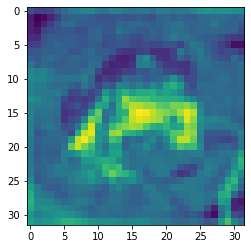

In [6]:
plt.imshow(df_x[0])

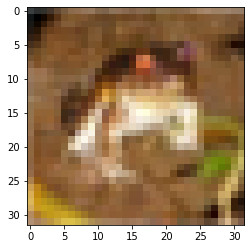

In [7]:
plt.imshow(df_y[0])

In [8]:
df_x.shape

(50000, 32, 32, 1)

In [9]:
df_y.shape

(50000, 32, 32, 3)

In [10]:
df_y=df_y/255

In [11]:
df_y[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [12]:
df_x=df_x/255

In [13]:
df_x[0]

array([[[0.24313725],
        [0.17647059],
        [0.18431373],
        ...,
        [0.50196078],
        [0.4745098 ],
        [0.47058824]],

       [[0.07843137],
        [0.        ],
        [0.02745098],
        ...,
        [0.32156863],
        [0.30196078],
        [0.32156863]],

       [[0.09019608],
        [0.02352941],
        [0.09411765],
        ...,
        [0.30588235],
        [0.30588235],
        [0.26666667]],

       ...,

       [[0.59607843],
        [0.48235294],
        [0.49019608],
        ...,
        [0.45882353],
        [0.10588235],
        [0.1254902 ]],

       [[0.51372549],
        [0.40784314],
        [0.45098039],
        ...,
        [0.53333333],
        [0.22745098],
        [0.2       ]],

       [[0.54509804],
        [0.48235294],
        [0.50980392],
        ...,
        [0.68235294],
        [0.43921569],
        [0.35294118]]])

In [14]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(32, 32, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 256)         590080    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 512)         2

In [15]:
model.fit(df_x,df_y, epochs=5)

Epoch 1/5
 435/1563 [=======>......................] - ETA: 28:32 - loss: 0.0328 - accuracy: 0.4148

KeyboardInterrupt: 